## Atividade 1
Crie um dataset que envolva apenas o indicador GDP e persista em um arquivo, sem as colunas "Indicator Name" e "Indicator Code"

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# reduzir número de casas decimais dos floats
pd.set_option('display.precision', 2)

# remover notação científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)


caminho = './'
arquivo = 'dataset_bancomundial.csv'

df_dados = pd.read_csv(caminho + arquivo, sep = ';', decimal = ',')

# filtrar ocorrencias de um único termo em uma coluna
filtro = ['GDP (Current USD)']
# filtrando apenas as linhas que contém o critério do filtro na coluna Indicator Name
df_gpd = df_dados.query("`Indicator Name` in @filtro")

print("Antes de remover haviam essas colunas.")
display(df_gpd.head(0))

df_gpd = df_gpd.drop(['Indicator Name', 'Indicator Code'], axis = 1)
print("Depois de removido há as seguintes colunas.")
display(df_gpd.head(0))

# gravando em um novo arquivo
df_gpd.to_csv('dataset_gpd_ex1.csv', sep = ';', decimal = ',')


Antes de remover haviam essas colunas.


,index,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


Depois de removido há as seguintes colunas.


,index,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


## Atividade 2
Selecione os países da América do Sul e crie um novo dataset, persistindo em arquivo

In [21]:
caminho = './'
arquivo = 'dataset_bancomundial_paises.csv'

filtro_paises_latinos = ['ARG', 'BRA', 'BOL',  'CHL', 'COL', 'ECU', 'GUY', 'PER', 'PRY', 'SUR', 'URY', 'VEN']

# lendo o arquivo
df_paises = pd.read_csv(caminho + arquivo, sep = ';', decimal = ',')

# filtrar ocorrencias de varios termos em uma coluna
df_paises_latinos = df_paises.query("`Country Code` in @filtro_paises_latinos")


# criando arquivo com dataframe
df_paises_latinos.to_csv('dataset_paises_latinos_ex2.csv', sep = ';', decimal = ',')

df_paises_latinos.head(4)

,index,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
6,6,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,The base year has changed to 2004.,Latin America & Caribbean,Upper middle income; based on FY13 income clas...,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011/12","Integrated household survey (IHS), 2012",Yes,2013,2002.00,2013.00,2011.00
21,21,BOL,Bolivia,Bolivia,Plurinational State of Bolivia,BO,Bolivian Boliviano,NaN,Latin America & Caribbean,Lower middle income; based on FY13 income clas...,...,Consolidated central government,General Data Dissemination System (GDDS),2012,"Demographic and Health Survey (DHS), 2008","Integrated household survey (IHS), 2012",NaN,2013,NaN,2013.00,2000.00
24,24,BRA,Brazil,Brazil,Federative Republic of Brazil,BR,Brazilian real,NaN,Latin America & Caribbean,Upper middle income; based on FY13 income clas...,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",NaN,2006,2011.00,2013.00,2010.00
36,36,CHL,Chile,Chile,Republic of Chile,CL,Chilean peso,NaN,Latin America & Caribbean,Upper middle income; based on FY13 income clas...,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2012,NaN,"Integrated household survey (IHS), 2011",Yes,2007,NaN,2013.00,2006.00


## Atividade 3
Crie um gráfico de controle, considerando a média e uma amplitude de 2 vezes o desvio padrão da série com o GDP para todos os países da América do Sul;

54


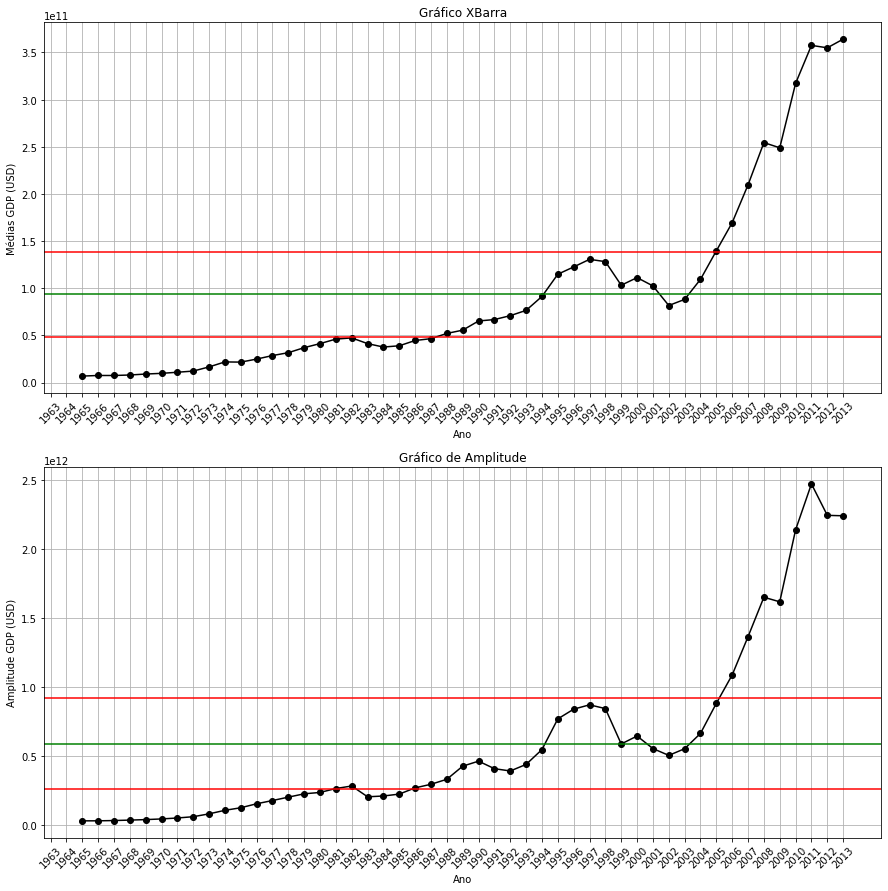

In [22]:

caminho = './'
arquivo_dados = 'dataset_gpd_ex1.csv'
arquivo_paises_latinos = 'dataset_paises_latinos_ex2.csv'

def lendo_arquivo(arquivo: str):
    return pd.read_csv(caminho + arquivo, sep=';', decimal=',')

df_dados = lendo_arquivo(arquivo_dados)
df_paises_latinos = lendo_arquivo(arquivo_paises_latinos)
filtro_paises_latinos = df_paises_latinos['Country Code']

# filtrando apenas as linhas que contém o critério do filtro na coluna Country Code
df_registros = df_dados.query("`Country Code` in @filtro_paises_latinos")
df_registros.reset_index(inplace=True, drop=True)

# gravando arquivo csv separado com gdp apenas dos países latinos
df_registros.to_csv('dataset_gpd_paises_latinos.csv', sep=';', decimal=',')

# deletando primeira coluna sem nome
df_registros = df_registros.iloc[:, 1:]

# apagando colunas
df_registros = df_registros.drop(
    ['index', 'Country Name', 'Country Code'], axis = 1)

# médias anuais
medias_GDP = df_registros.mean(numeric_only = True, skipna = False, axis = 0)

# amplitudes anuais
amplitudes_GDP = df_registros.max(numeric_only = True, skipna = False, axis = 0) - df_registros.min(numeric_only = True, skipna = False, axis = 0)

# desvio padrão anuais
std_GDP = df_registros.std(numeric_only = True, skipna = False, axis = 0)

df_resultado = pd.DataFrame(
    {'Média': medias_GDP, 'Desvio': std_GDP, "Amplitude": amplitudes_GDP}).reset_index()

anos = df_resultado['index']
medias = df_resultado['Média']
desvios = df_resultado['Desvio']
amplitude = df_resultado['Amplitude']
linhas, colunas = df_registros.shape

media_geral = medias.mean()
amplitude_geral = amplitude.mean()
desvio_geral = desvios.mean()

# Limites de controle x-bar
# media_geral + 2 * desvio_padrao / raiz(colunas)
lsc_xbar = media_geral + 2 * desvio_geral / math.sqrt(colunas)
lm_xbar = media_geral
lic_xbar = media_geral - 2 * desvio_geral / math.sqrt(colunas)

# Plot x-bar and s charts
fig, axs = plt.subplots(2, figsize = (15,15))

# x-bar chart
axs[0].plot(anos, medias, linestyle = '-', marker = 'o', color = 'black')
# limite superior de controle
axs[0].axhline(lsc_xbar, color = 'red')
axs[0].axhline(lic_xbar, color = 'red')
axs[0].grid()
axs[0].axhline(lm_xbar, color = 'green')
axs[0].set_title('Gráfico XBarra')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Médias GDP (USD)')
axs[0].xaxis.set_tick_params(rotation = 45)

# Limites de controle amplitude
# amplitude_geral + 2 * const d3 * desvio_padrao
lsc_r = amplitude_geral + 2 * desvio_geral
lm_r = amplitude_geral
lcl_r = amplitude_geral - 2 * desvio_geral

# r-chart
axs[1].plot(anos, amplitude, linestyle = '-', marker = 'o', color = 'black')
axs[1].axhline(lsc_r, color = 'red')
axs[1].axhline(lcl_r, color = 'red')
axs[1].axhline(lm_r, color = 'green')
axs[1].set_title('Gráfico de Amplitude')
axs[1].set_xlabel('Ano')
axs[1].set_ylabel('Amplitude GDP (USD)')
axs[1].grid()
axs[1].xaxis.set_tick_params(rotation = 45)
plt.show()


## Exercício 4
Identifique os anos e os países que se encontram fora da faixa de controle;

In [23]:
import pandas as pd
caminho = './'
arquivo_dados_paises_latinos = 'dataset_gpd_paises_latinos.csv'

# lendo arquivo
dataset_dados_paises_latinos = pd.read_csv(caminho + arquivo_dados_paises_latinos, sep = ';', decimal = ',')

dataset_dados_paises_latinos.reset_index(inplace = True, drop = True)
 
# deletando duas primeiras colunas sem nome 
dataset_dados_paises_latinos = dataset_dados_paises_latinos.iloc[: , 2:]

# apagando colunas
dataset_dados_paises_latinos = dataset_dados_paises_latinos.drop(['index', 'Country Name', 'Country Code'], axis = 1) 

desvio_padrao_anos = dataset_dados_paises_latinos.std(numeric_only = True, skipna = True, axis = 0)

df_desvio = pd.DataFrame({'Desvio': desvio_padrao_anos}).reset_index() 
 
med = df_desvio['Desvio'].mean()

display(dataset_dados_paises_latinos)

maiores_desvio_padrao = dataset_dados_paises_latinos.agg(lambda x : x > med * 2 )
menores_desvio_padrao = dataset_dados_paises_latinos.agg(lambda x : x < med * -2 )

display(maiores_desvio_padrao)
display(menores_desvio_padrao)

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,NaN,NaN,24450604878.00,18272123664.00,25605249382.00,28344705968.00,28630474726.00,24256667555.00,26436857248.00,31256284545.00,...,183296000000.00,222908000000.00,264490000000.00,329761000000.00,406004000000.00,378496000000.00,462704000000.00,557727000000.00,603153000000.00,609889000000.00
1,563110051.90,612518906.80,669722541.30,721142957.30,812543072.50,908874537.00,994044553.90,1084059815.00,908874537.00,964615698.70,...,8773451739.00,9549196256.00,11451845341.00,13120183157.00,16674324634.00,17339992165.00,19649631308.00,23948541156.00,27035110130.00,30601157742.00
2,15165569913.00,15236854859.00,19926293839.00,23021477292.00,21211892260.00,21790035102.00,27062716511.00,30591834045.00,33875881906.00,37458898265.00,...,663760000000.00,882186000000.00,1088920000000.00,1366820000000.00,1653510000000.00,1620190000000.00,2143070000000.00,2476690000000.00,2248780000000.00,2245670000000.00
3,4211762522.00,4705377500.00,5502763243.00,5482749434.00,5794301527.00,6053790468.00,7013580346.00,6913560997.00,7074820186.00,8179771226.00,...,100631000000.00,124404000000.00,154671000000.00,173006000000.00,179858000000.00,172323000000.00,217502000000.00,251162000000.00,266259000000.00,277199000000.00
4,4040948305.00,4552914130.00,4968598031.00,4838841456.00,5992169467.00,5790247619.00,5452762963.00,5727208180.00,5918467519.00,6405440200.00,...,117075000000.00,146520000000.00,162774000000.00,207520000000.00,244057000000.00,233822000000.00,287018000000.00,335415000000.00,370328000000.00,378415000000.00
5,1010325138.00,979108806.80,958598195.00,1038389642.00,1156150890.00,2387048255.00,2429309514.00,2553596092.00,2582180794.00,3112166848.00,...,36591661000.00,41507085000.00,46802044000.00,51007777000.00,61762635000.00,62519686000.00,69555367000.00,79276664000.00,87623411000.00,94472679000.00
6,170216238.90,185849532.90,194949510.00,175757891.60,194774510.50,213235288.10,228705875.90,250176463.60,229750000.00,249300000.00,...,785918769.60,824880550.30,1458449058.00,1740334782.00,1922598121.00,2025565089.00,2259288396.00,2576602497.00,2851154076.00,2990128821.00
7,NaN,NaN,NaN,NaN,NaN,400129691.10,421700441.80,451524124.50,477012512.70,512728946.20,...,8033877360.00,8734651406.00,10662013273.00,13794909537.00,18504128632.00,15929903100.00,20030529733.00,25071193102.00,24611040343.00,29009411738.00
8,2503708501.00,2822764382.00,3199617471.00,3505470788.00,4241381119.00,5026099956.00,5947054339.00,6029751897.00,5583979280.00,6250645607.00,...,66730306800.00,74963815413.00,87985689388.00,102172000000.00,121572000000.00,121200000000.00,148523000000.00,170564000000.00,192628000000.00,202350000000.00
9,93850000.00,98400000.00,103500000.00,110000000.00,120850000.00,138650000.00,171100000.00,198450000.00,220600000.00,233450000.00,...,1484092538.00,1793557833.00,2626093294.00,2936612022.00,3532969035.00,3875409836.00,4368398048.00,4423194614.00,5013030303.00,5298787879.00


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
